### 1. Import Required Libraries

### 2. Load Your Data

```data = pd.read_csv('your_data.csv')```

### 3. Explore and Preprocess the Data (Convert to Tensors to use Pytorch!!!!)

```print(data.info())  # Understand the structure of your data```

```data.fillna(method='ffill', inplace=True)  # Handle missing values```

### 4. Define Features and Target

`X = data.drop('target_column', axis=1)`

   `y = data['target_column']`

### 5. Split the Data

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`

### 6. Create the NN class

### 7. Create citerion + optimizer

`criterion = nn.CrossEntropyLoss()`

`optimizer = torch.optim.Adam(model.parameters(), lr=0.001)`

### 8. Training loop

`model.train()`

`batch_y_probs = model(x_train)`

`loss = criterion(batch_y_probs, batch_y)`

`optimizer.zero_grad()`

`loss.backward()`

`optimizer.step()`


### 9. Evaluate the Model

`with torch.no_grad():`

  `y_eval = model.forward(X_test)`

  `loss = criterion(y_eval, y_test)`


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F


In [93]:
data = pd.read_csv('iris.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

data['variety'] = label_encoder.fit_transform(data['variety'])

data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [94]:
x = data.drop('variety', axis=1)
y = data['variety']

In [95]:
# Convert these to numpy arrays
x = x.values
y = y.values

In [96]:
print(x.shape)

(150, 4)


In [97]:
print(y.shape)

(150,)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
     

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [100]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.layer1 = nn.Linear(in_features, h1)
    self.layer2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = self.out(x)
    
    # #Another way
    # z1 = self.layer_1(x)
    # a1 = self.hidden_activation(z1)

    # z2 = self.layer_2(a1)
    # a2 = self.softmax(z2)
    
  
    return x


In [101]:
model = Model()
print(model)
print(model.parameters())

Model(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)
<generator object Module.parameters at 0x00000154BD5A34C0>


In [102]:
from torch.optim import Adam
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [103]:

epochs = 1000
losses = []
model.train()

for i in range(epochs):
    # Forward pass
    y_pred = model.forward(X_train)
    
    # Compute loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    # print every 10 epoch
    if i % 10 == 0:
      print(f'Epoch: {i} and loss: {loss}')
      
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




Epoch: 0 and loss: 1.2294524908065796
Epoch: 10 and loss: 0.8919476866722107
Epoch: 20 and loss: 0.6317808032035828
Epoch: 30 and loss: 0.40249207615852356
Epoch: 40 and loss: 0.26628443598747253
Epoch: 50 and loss: 0.16571025550365448
Epoch: 60 and loss: 0.1075841411948204
Epoch: 70 and loss: 0.08150063455104828
Epoch: 80 and loss: 0.07003290206193924
Epoch: 90 and loss: 0.06427158415317535
Epoch: 100 and loss: 0.06097833439707756
Epoch: 110 and loss: 0.05886974558234215
Epoch: 120 and loss: 0.057383954524993896
Epoch: 130 and loss: 0.0562584213912487
Epoch: 140 and loss: 0.055358611047267914
Epoch: 150 and loss: 0.05461077392101288
Epoch: 160 and loss: 0.053970035165548325
Epoch: 170 and loss: 0.0534076951444149
Epoch: 180 and loss: 0.05290539935231209
Epoch: 190 and loss: 0.052450019866228104
Epoch: 200 and loss: 0.052031259983778
Epoch: 210 and loss: 0.05164230242371559
Epoch: 220 and loss: 0.05127861350774765
Epoch: 230 and loss: 0.05093682184815407
Epoch: 240 and loss: 0.05061474

Text(0.5, 0, 'Epoch')

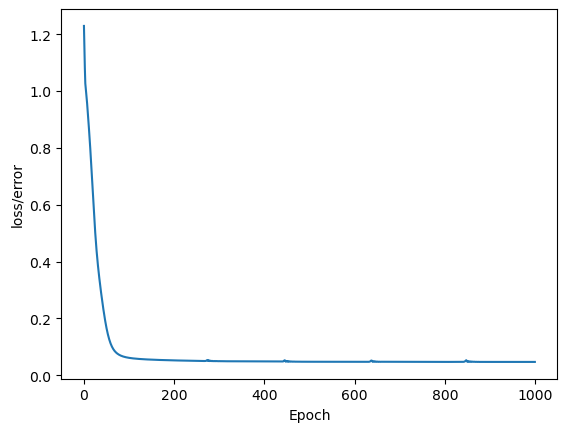

In [104]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')


In [105]:
model.eval()
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error
loss
#Just without updating the weights

tensor(0.0161)

In [106]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')


1.)  tensor([-7.1126,  8.2054, -0.6935]) 	 1 	 1
2.)  tensor([ 13.6550,   3.4211, -27.2223]) 	 0 	 0
3.)  tensor([-22.8518,   5.0906,  26.0322]) 	 2 	 2
4.)  tensor([-8.2027,  7.7273,  1.5741]) 	 1 	 1
5.)  tensor([-8.8590,  8.1658,  1.7999]) 	 1 	 1
6.)  tensor([ 12.7245,   3.2882, -25.4752]) 	 0 	 0
7.)  tensor([-3.0719,  7.3190, -5.5765]) 	 1 	 1
8.)  tensor([-16.0205,   6.2946,  14.6413]) 	 2 	 2
9.)  tensor([-10.1085,   6.9939,   5.1864]) 	 1 	 1
10.)  tensor([-4.0761,  7.6804, -4.5354]) 	 1 	 1
11.)  tensor([-13.6149,   6.8252,  10.5098]) 	 2 	 2
12.)  tensor([ 13.0737,   2.8640, -25.2401]) 	 0 	 0
13.)  tensor([ 14.4168,   3.0817, -27.7785]) 	 0 	 0
14.)  tensor([ 13.2262,   2.9341, -25.6399]) 	 0 	 0
15.)  tensor([ 13.9107,   3.0666, -26.9902]) 	 0 	 0
16.)  tensor([-8.6361,  8.0521,  1.7666]) 	 1 	 1
17.)  tensor([-18.0887,   5.6359,  18.5278]) 	 2 	 2
18.)  tensor([-3.9474,  7.5034, -4.4991]) 	 1 	 1
19.)  tensor([-7.0743,  7.8483, -0.2035]) 	 1 	 1
20.)  tensor([-17.7392,   